<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/temperatura_max_analise_DEU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>**Analyzing the Average Maximum Temperature**
**Analisando a média da Temperatura Máxima**<font>

---


Importing the Data
---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the packages 
import pandas as pd
import numpy as np
import chardet
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

**Reading CSV**

In [3]:
file_path ='/content/drive/MyDrive/Data_Lake/temperatura_preciptacao/'
tipo = 'tasmax_'
anos ='1901_2020_'
pais = "DEU"

file = f"{tipo}{anos}{pais}.csv"

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [5]:
arquivo = f"{tipo}{pais}"
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as arquivo :
  df_tasmax = pd.read_csv(arquivo)

 
**DataFrame**

In [6]:
df_tasmax

,tasmax,Year,Statistics,Country,ISO3
0,-0.4,1901,Jan Average,Germany,DEU
1,-0.4,1901,Feb Average,Germany,DEU
2,5.9,1901,Mar Average,Germany,DEU
3,12.9,1901,Apr Average,Germany,DEU
4,18.5,1901,May Average,Germany,DEU
...,...,...,...,...,...
1435,26.2,2020,Aug Average,Germany,DEU
1436,21.1,2020,Sep Average,Germany,DEU
1437,13.9,2020,Oct Average,Germany,DEU
1438,10.0,2020,Nov Average,Germany,DEU


In [7]:
#Dataframe size
df_tasmax.shape

(1440, 5)

In [8]:
#Dataframe informations
df_tasmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tasmax       1440 non-null   float64
 1    Year        1440 non-null   int64  
 2    Statistics  1440 non-null   object 
 3    Country     1440 non-null   object 
 4    ISO3        1440 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 56.4+ KB


In [9]:
#identifying coluns's names
df_tasmax.columns

Index(['tasmax', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [10]:
#cleaning columns names
colunas = [c.strip().lower().replace(" ","_") for c in df_tasmax.columns]
df_tasmax.columns = colunas
   

df_tasmax.head(5)

,tasmax,year,statistics,country,iso3
0,-0.4,1901,Jan Average,Germany,DEU
1,-0.4,1901,Feb Average,Germany,DEU
2,5.9,1901,Mar Average,Germany,DEU
3,12.9,1901,Apr Average,Germany,DEU
4,18.5,1901,May Average,Germany,DEU


In [11]:
#checking columns' names after modifications
df_tasmax.columns

Index(['tasmax', 'year', 'statistics', 'country', 'iso3'], dtype='object')

In [12]:
#defining a function to replace values inside the index column 
def replace (col): 
    return col.replace(" Average",'').strip()

In [13]:
 #creating a dict to redefining some columns' names
 renomeando = {'statistics':'month'}

In [14]:
#defining a function to create a conditional new column
def year_season(row):
    seasons = {"spring":["Mar","Apr","May"], 'summer':["Jun","Jul","Aug"],'autumn':['Sep',"Oct","Nov"],'winter':["Dec","Jan","Feb"]}
    key_list = list(seasons.keys())
    val_list = list(seasons.values())
    for meses in seasons.values():
        for m in meses:
            if m == row['month']:
                indice =val_list.index(meses)
                #print(indice,meses)
                #print(key_list[indice])
                return key_list[indice]

In [15]:
#Filtering years from 1960 onwards, cleaning and renaming columns
df_tasmax_test_season=\
(
    df_tasmax.loc[df_tasmax['year']>=1960,:]
    .rename(columns=renomeando)
    .set_index("month")
    .rename(index=replace)
    .reset_index()
    
    
)

df_tasmax_test_season.loc[::,['country','iso3']]=df_tasmax_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())

df_tasmax_test_season.head()

,month,tasmax,year,country,iso3
0,Jan,2.5,1960,Germany,DEU
1,Feb,3.7,1960,Germany,DEU
2,Mar,8.2,1960,Germany,DEU
3,Apr,12.5,1960,Germany,DEU
4,May,18.4,1960,Germany,DEU


In [16]:
df_tasmax_test_season.iloc[0,3]

'Germany'

In [17]:
df_tasmax_test_season.loc[::,['country','iso3']].applymap(lambda x: x.strip())
df_tasmax_test_season.country.apply(lambda x: x.strip()).iloc[0]


'Germany'

In [18]:
#df_tasmax_test_season['country'].str.strip()
#df_tasmax_test_season['country'].apply(lambda x: x.strip())

In [19]:
#Including the conditional column: season
df_tasmax_season =df_tasmax_test_season.assign(season = df_tasmax_test_season.apply(year_season,axis=1))



In [20]:
df_tasmax_season

,month,tasmax,year,country,iso3,season
0,Jan,2.5,1960,Germany,DEU,winter
1,Feb,3.7,1960,Germany,DEU,winter
2,Mar,8.2,1960,Germany,DEU,spring
3,Apr,12.5,1960,Germany,DEU,spring
4,May,18.4,1960,Germany,DEU,spring
...,...,...,...,...,...,...
727,Aug,26.2,2020,Germany,DEU,summer
728,Sep,21.1,2020,Germany,DEU,autumn
729,Oct,13.9,2020,Germany,DEU,autumn
730,Nov,10.0,2020,Germany,DEU,autumn


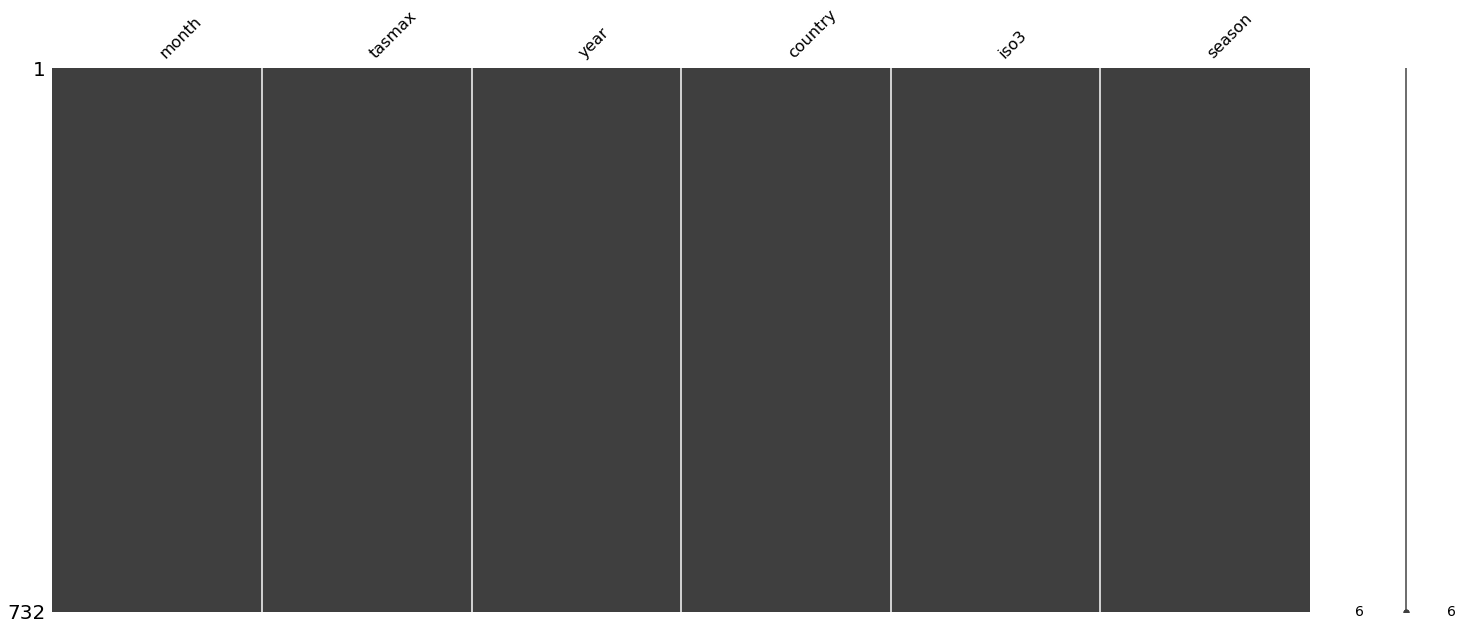

In [21]:
#Verifying NAN values
msno.matrix(df_tasmax_season)

In [22]:
df_tasmax_season.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/limpos/tasmax_temperatura_max_avg/{tipo}{anos}{pais}_seasons.csv", index=False)

**Improving the memory usage**

---

In [23]:
#Verifying the shape
df_tasmax_season.shape


(732, 6)

In [24]:
#Verifying types and memory usage
original_info = df_tasmax_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    732 non-null    object 
 1   tasmax   732 non-null    float64
 2   year     732 non-null    int64  
 3   country  732 non-null    object 
 4   iso3     732 non-null    object 
 5   season   732 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.4+ KB


In [25]:
#Verifying memory usage
original_mem = df_tasmax_season.memory_usage(deep=True)


In [26]:
#Checking the low cardinality
df_tasmax_season.select_dtypes(include=["object"]).nunique()

month      12
country     1
iso3        1
season      4
dtype: int64

In [27]:
#Changing the columns types
col_to_category = ['month',"country","iso3","season"]

df_tasmax_season["year"]= df_tasmax_season["year"].astype("int32")
df_tasmax_season[col_to_category]=df_tasmax_season[col_to_category].astype("category")

df_tasmax_season

,month,tasmax,year,country,iso3,season
0,Jan,2.5,1960,Germany,DEU,winter
1,Feb,3.7,1960,Germany,DEU,winter
2,Mar,8.2,1960,Germany,DEU,spring
3,Apr,12.5,1960,Germany,DEU,spring
4,May,18.4,1960,Germany,DEU,spring
...,...,...,...,...,...,...
727,Aug,26.2,2020,Germany,DEU,summer
728,Sep,21.1,2020,Germany,DEU,autumn
729,Oct,13.9,2020,Germany,DEU,autumn
730,Nov,10.0,2020,Germany,DEU,autumn


Comparing Memory Usage

In [28]:
#Verifying new memory usage
new_memory = df_tasmax_season.memory_usage(deep=True)


In [29]:
# Comparying memory usage
old_value ='\033[91m'
new_value ='\033[1;32m'
normal_value = '\033[0m'
print(old_value + "This is the original memory usage" + normal_value)
print(original_mem)
print(new_value + "\nAnd this is the new memory usage" + normal_value)
print(new_memory)


This is the original memory usage
Index        128
month      43920
tasmax      5856
year        5856
country    46848
iso3       43920
season     46116
dtype: int64

And this is the new memory usage
Index       128
month      1772
tasmax     5856
year       2928
country     876
iso3        872
season     1144
dtype: int64


In [30]:
#Checking new info data
new_info = df_tasmax_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   month    732 non-null    category
 1   tasmax   732 non-null    float64 
 2   year     732 non-null    int32   
 3   country  732 non-null    category
 4   iso3     732 non-null    category
 5   season   732 non-null    category
dtypes: category(4), float64(1), int32(1)
memory usage: 12.3 KB


In [31]:
#Checking the describe method
df_tasmax_season['tasmax'].describe().T

count    732.000000
mean      13.081694
std        7.556226
min       -4.100000
25%        6.400000
50%       13.300000
75%       20.000000
max       27.800000
Name: tasmax, dtype: float64

*PLOTTING YEARS*

In [32]:
#Defining the df to chart
df_tasmax_season_chart =\
(
    df_tasmax_season.set_index("month")
)

df_tasmax_season_chart

,tasmax,year,country,iso3,season
month,,,,,
Jan,2.5,1960,Germany,DEU,winter
Feb,3.7,1960,Germany,DEU,winter
Mar,8.2,1960,Germany,DEU,spring
Apr,12.5,1960,Germany,DEU,spring
May,18.4,1960,Germany,DEU,spring
...,...,...,...,...,...
Aug,26.2,2020,Germany,DEU,summer
Sep,21.1,2020,Germany,DEU,autumn
Oct,13.9,2020,Germany,DEU,autumn


In [33]:
#Importing the package and defining the colors to plot
import matplotlib.dates as mdt
blue = '#99ddee'
white = '#ffffff'

In [34]:
#Defining the plot's function
def plot_year(ax,temp,years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    filtro_1 = df_tasmax_season_chart.year == y
    ax.plot(df_tasmax_season_chart.index[filtro_1],df_tasmax_season_chart.loc[filtro_1,'tasmax'].values)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Celsius Max Temperature', color=white)
    ax.set_title(f"Year {y}", color=white, fontweight='bold')
    ax.fill_between(df_tasmax_season_chart.index,min(df_tasmax_season_chart['tasmax']), max(df_tasmax_season_chart['tasmax'])+5,  facecolor='white' )


In [35]:
df_tasmax_season_chart_x = df_tasmax_season_chart.reset_index()

In [ ]:
#Ploting the years
years = range(2000,2020+1)
fig, axs = plt.subplots(ncols =3, nrows = int(len(years)/3),figsize=(20,25), linewidth = 5, facecolor = blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):

    ax= axs[i]
 
    data_1=\
    (
        df_tasmax_season_chart_x.assign(YEAR=pd.to_datetime(df_tasmax_season_chart_x.year))
        .set_index("year")
        .loc[y]
        .tasmax
        .interpolate()  
    )
 

    if max_val is None or max_val < data_1.max():
        max_val = data_1.max()
        max_data = data_1
        max_ax = ax

    ax.set_ylim(min(data_1.values), max((data_1.values))+5)
    years = {y}
    plot_year(ax, data_1, years)


fig.suptitle(f'Average Max Temperature {pais}', color='white', fontweight='bold',fontsize=20 )
fig.tight_layout( rect= [0,0.03, 1, 0.95])
fig.savefig(f'/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmax_temperatura_max_media/Average Max Temperature by Year {pais}.png', dpi=300, facecolor=blue)



*PLOTTING QUARTILES*

In [ ]:
#Defining data to Seasons' Quartile
temp_season = ['tasmax','season']
df_temp_season= df_tasmax_season[temp_season]


In [ ]:
#Ploting Quartiles
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
fig.suptitle(f"Quartiles Max Temp {pais}", size=20, y=1.00)
df_temp_season.pivot(columns='season').plot.box(ax=ax1,title="Seasons' Quartiles")
df_tasmax_season['tasmax'].plot.box(ax=ax2, title="General Quartile")
fig.savefig(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/charts/tasmax_temperatura_max_media/{pais} Seasons'Quartiles")

In [ ]:
country=df_tasmax_season_chart.iloc[0,2]


In [ ]:
iso3=df_tasmax_season_chart.iloc[0,3]


In [ ]:
iso3

In [ ]:
country

In [ ]:
#Defining data to General Quartile
general_quartile= df_tasmax_season['tasmax'].describe()[['min','25%','50%','75%','max']].round(2).to_frame().assign(country=country).assign(iso3=iso3)
general_quartile

In [ ]:
general_quartile.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_max_AVG/{pais}_General_Quartile.csv")

In [ ]:
seasons_quartiles=\
(
    df_temp_season.pivot(columns='season')
    .describe()
    .loc[['min','25%','50%','75%',"max"]]
    .round(2)
    
    
)

#quartil_temp_seasons.columns=quartil_temp_seasons.columns.droplevel()
seasons_quartiles

In [ ]:
seasons_quartiles.columns=\
(
    seasons_quartiles.columns.droplevel().add_categories(['country','iso3'])
       
)
seasons_quartiles=seasons_quartiles.assign(country=country).assign(iso3=iso3)
seasons_quartiles.index.name='quartil'
seasons_quartiles

In [ ]:
seasons_quartiles.to_csv(f"/content/drive/MyDrive/Temperatura_Precipitacao_analises/notebooks/Quartiles/Temp_max_AVG/{pais}_Seasons_Quartiles_Max_Temp.csv")